Bu ödevde yine [Öğrencilerin Sınav Performansı](https://www.kaggle.com/spscientist/students-performance-in-exams/home)'na  ait verileri kullanacaksınız. [Veri kümesini](https://www.kaggle.com/spscientist/students-performance-in-exams/home) daha önce indirmediyseniz Kaggle'dan indirin. 

Bu ödevi tamamlamak için, aşağıdaki soruların çözümlerini içeren Jupyter notebook dosyasının Github linkini gönderin. Kafanıza takılan konuları mentörünüzle konuşabilir ya da ofis saatinde Slack üzerinden sorabilirsiniz.

1. Sınavlardaki performans cinsiyete, kökene ve anne-baba eğitim durumuna göre değişiklik göstermekte midir?

2. Öğle yemek tipinin sınav performansları ile bir ilişkisi var mı? Varsa bunu nasıl açıklayabilirsiniz? 

3. Hazırlık kurslarının sonav performansı üzerinde bir etkisi var mı? 

4. Birbiriyle korelasyonu en fazla olan dersler hangisidir? 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)

In [34]:
df=pd.read_csv('StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


Sınavlardaki performans cinsiyete, kökene ve anne-baba eğitim durumuna göre değişiklik göstermekte midir?

In [3]:
df['average_score'] = df[['math score', 'reading score','writing score']].mean(axis=1)

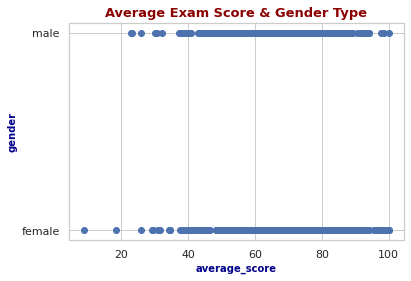

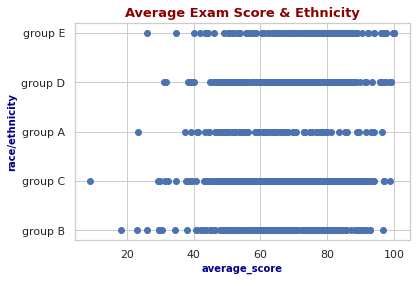

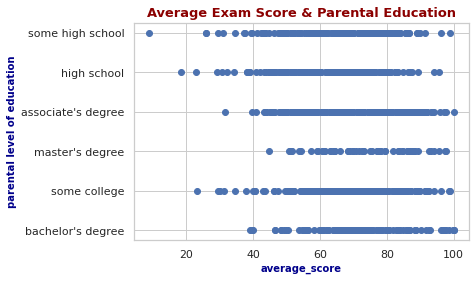

In [15]:
baslik_font = {'family': 'DejaVu Sans', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'DejaVu Sans', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.scatter(df['average_score'], df['gender'])
plt.title("Average Exam Score & Gender Type", fontdict=baslik_font)
plt.xlabel('average_score', fontdict=eksen_font )
plt.ylabel('gender', fontdict=eksen_font )
plt.show()

plt.scatter(df['average_score'], df['race/ethnicity'])
plt.title("Average Exam Score & Ethnicity", fontdict=baslik_font)
plt.xlabel('average_score', fontdict=eksen_font )
plt.ylabel('race/ethnicity', fontdict=eksen_font )
plt.show()

plt.scatter(df['average_score'], df['parental level of education'])
plt.title("Average Exam Score & Parental Education", fontdict=baslik_font)
plt.xlabel('average_score', fontdict=eksen_font )
plt.ylabel('parental level of education', fontdict=eksen_font )
plt.show()

Performance in the exams does not differ according to gender, origin and educational status of parents. There is no significant difference or relationship between categorical variables.

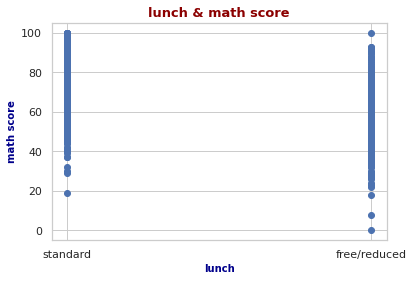

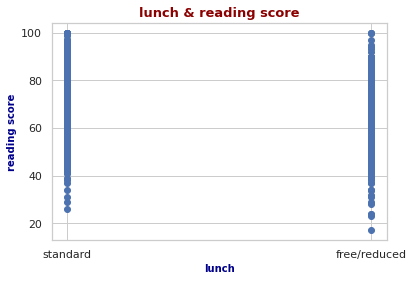

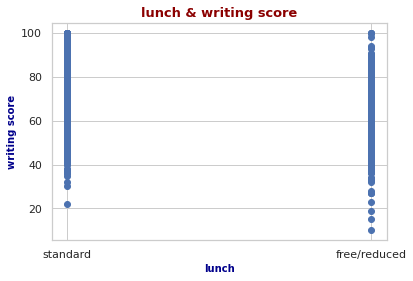

In [14]:

plt.scatter(df['lunch'], df['math score'])
plt.title("lunch & math score", fontdict=baslik_font)
plt.xlabel('lunch', fontdict=eksen_font )
plt.ylabel('math score', fontdict=eksen_font )
plt.show()

plt.scatter(df['lunch'], df['reading score'])
plt.title("lunch & reading score", fontdict=baslik_font)
plt.xlabel('lunch', fontdict=eksen_font )
plt.ylabel('reading score', fontdict=eksen_font )
plt.show()

plt.scatter(df['lunch'], df['writing score'])
plt.title("lunch & writing score", fontdict=baslik_font)
plt.xlabel('lunch', fontdict=eksen_font )
plt.ylabel('writing score', fontdict=eksen_font )
plt.show()

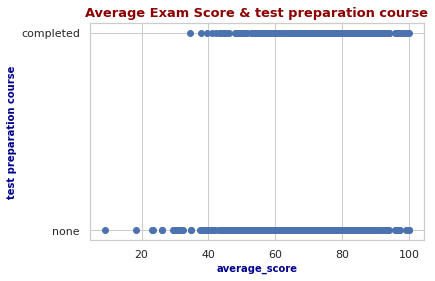

In [16]:
plt.scatter(df['average_score'], df['test preparation course'])
plt.title("Average Exam Score & test preparation course", fontdict=baslik_font)
plt.xlabel('average_score', fontdict=eksen_font )
plt.ylabel('test preparation course', fontdict=eksen_font )
plt.show()

Those who do not take the exam preparation courses show concentration between 0-40 points, while those who complete the preparatory course almost do not have a grade lower than 40.

# Correlation Matrix

reading score	

In [35]:
corr_df=df.corr()[:-1]
corr_df

,math score,reading score,writing score
math score,1.000,0.818,0.803
reading score,0.818,1.000,0.955


(another method)

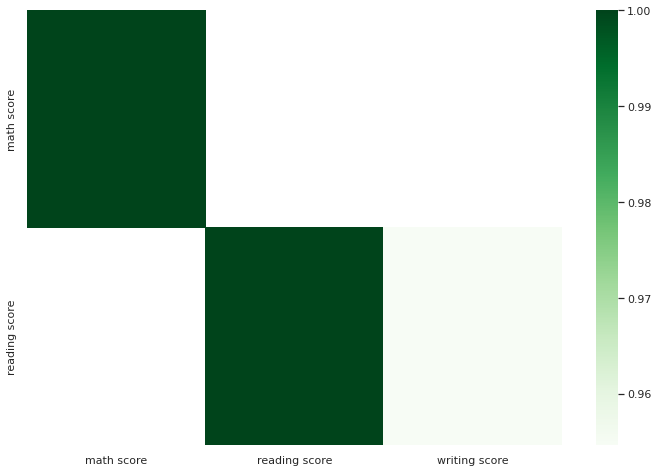

In [36]:
kot = corr_df[corr_df>=.9]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greens")

(another method)

In [37]:
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

corrFilter(df, .7)

math score     writing score   0.803
               reading score   0.818
reading score  writing score   0.955
math score     math score        nan
dtype: float64

the most corr : between reading score and writing score.